# Feature Importance with Ensembles

In [19]:
# Imports
from sklearn.datasets import load_digits, fetch_openml
from sklearn.preprocessing import OrdinalEncoder
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Step 0 -- Data Exploration & Preprocessing

We will use three datasets throughout this tutorial:

1. **Adult** – Tabular classification
2. **Student Performance** – Tabular multi-target regression
3. **Digits** – Image classification

Let's explore each of them to understand their structure, features, and targets.

#### Adult: Tabular classification

In [20]:
# Adult dataset
data_adult = fetch_openml("adult", version=2, as_frame=True)

# split into features (X) and target (y)
X_adult = data_adult.data
y_adult = data_adult.target

# for illustration purposes, let's work with only a subset of features
feature_subset = ['age', 'education-num', 'race', 'sex', 'hours-per-week']
X_adult = X_adult[feature_subset]

In [21]:
# Features
print("Shape:", X_adult.shape)
X_adult.head()

Shape: (48842, 5)


,age,education-num,race,sex,hours-per-week
0,25,7,Black,Male,40
1,38,9,White,Male,50
2,28,12,White,Male,40
3,44,10,Black,Male,40
4,18,10,White,Female,30


In [22]:
# Target
print("Shape:", y_adult.shape)
y_adult.head()

Shape: (48842,)


0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: class, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [23]:
# Preprocessing

# Identify categorical columns
categorical_cols = X_adult.select_dtypes(include="category").columns

# Apply ordinal encoding
encoder = OrdinalEncoder()
X_adult = X_adult.copy()
X_adult.loc[:, categorical_cols] = encoder.fit_transform(X_adult[categorical_cols])

<div style="border: 1px solid #ffcc00; background-color: #fff8e1; padding: 10px; border-radius: 5px; color: black;">
<b>❓ Question:</b> How did one-hot encoding change the data?
</div>

In [24]:
# your code
...

#### Student Performance: Tabular multi-target regression

In [25]:
# Student performance dataset
data_students = fetch_ucirepo(id=320) 

# split into features and target
X_students = data_students.data.features 
Y_students = data_students.data.targets 

In [26]:
# Features
print("Shape:", X_students.shape)
X_students.head()

Shape: (649, 30)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [27]:
# Targets
print("Shape:", Y_students.shape)
Y_students.head()

Shape: (649, 3)


,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [28]:
# Check the grade range
Y_students.describe()

,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


In [29]:
# Preprocessing

# Encode categorical features
X_students = pd.get_dummies(X_students)

#### Digits: Image classification

In [30]:
# Digits dataset
data_digits = load_digits()

# split into features and target
X_digits = data_digits.data
y_digits = data_digits.target

In [31]:
print("Shape:", X_digits.shape)
print("Target classes:", np.unique(y_digits))

Shape: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]


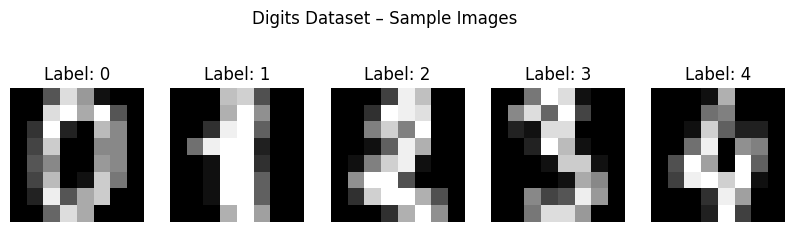

In [32]:
# Show first few images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(data_digits.images[i], cmap="gray")
    ax.set_title(f"Label: {y_digits[i]}")
    ax.axis("off")
plt.suptitle("Digits Dataset – Sample Images")
plt.show()